# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [5]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [6]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [7]:
#pour chaque puissance de xi on la multiplie avec xj avec j allant de 0 à i de tel sorte a avoir toutes les combinaisons possibles en sorte que i+j<=6
def mapping(X):
    degree=6
    cols = sum(range(1,degree+2))
    
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree+1):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j))
            print("x1^",i-j,"x2^",j)
            k=k+1

    return outX    

def mappingOneLine(X):
    degree=6
    cols = sum(range(1,degree+2))
    
    outX= np.ones((cols,))
    k=0
    for i in range(degree+1):
        for j in range(i+1):
            outX[k] = pow(X[1],i-j)*(pow(X[2],j))
            k=k+1

    return outX    


In [8]:
X2=mapping(X)
X2.shape


x1^ 0 x2^ 0
x1^ 1 x2^ 0
x1^ 0 x2^ 1
x1^ 2 x2^ 0
x1^ 1 x2^ 1
x1^ 0 x2^ 2
x1^ 3 x2^ 0
x1^ 2 x2^ 1
x1^ 1 x2^ 2
x1^ 0 x2^ 3
x1^ 4 x2^ 0
x1^ 3 x2^ 1
x1^ 2 x2^ 2
x1^ 1 x2^ 3
x1^ 0 x2^ 4
x1^ 5 x2^ 0
x1^ 4 x2^ 1
x1^ 3 x2^ 2
x1^ 2 x2^ 3
x1^ 1 x2^ 4
x1^ 0 x2^ 5
x1^ 6 x2^ 0
x1^ 5 x2^ 1
x1^ 4 x2^ 2
x1^ 3 x2^ 3
x1^ 2 x2^ 4
x1^ 1 x2^ 5
x1^ 0 x2^ 6


(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [9]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))
 

In [10]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [11]:
def computeCostReg(X, y, theta):
    # calculer le coût pour une valeur de theta donnée
    return 1/(2*X.shape[0])*np.sum(np.power(Sigmoid((np.dot(X,theta))-y),2))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [12]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    for i in range(0,iterations):
        theta=theta-(alpha/X.shape[0])*np.dot(X.T,(Sigmoid(np.dot(X,theta))-y))

    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [13]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Calculer le cout initial

In [14]:
initialCost=computeCostReg(X2, y, theta)
print(initialCost)

0.08133521318412613


Appel des la fonction de calcul du gradient

In [15]:
# paramètres
iterations = 4000
alpha = 0.01

# paramètre de regression
lambdaa = 1

# Appel
theta = gradientDescent(X2, y, theta, alpha, iterations)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [16]:
from matplotlib.colors import ListedColormap


def drawCircle(theta):

    # create data for the surface
    x1 = np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 100)
    y1 = np.linspace(X[:,2].min()-0.1, X[:,2].max()+0.1, 100)


    z = np.zeros((x1.shape[0], y1.shape[0]))
    for i in range(x1.shape[0]):
        for j in range(y1.shape[0]):
            if(Sigmoid(np.dot(mappingOneLine([1,x1[i],y1[j]]),theta)) > 0.5):
                z[i,j] = 1
            else:
                z[i,j] = 0

    x1, y1 = np.meshgrid(x1, y1)

    # set the axis labels

    cmap = plt.cm.get_cmap('jet')
    colors = ['red', 'blue']
    cmap = ListedColormap([(50,0,0,0.2),(0,0,50,0.2)])
    print(x1.shape, y1.shape)
    plt.contourf(x1, y1, z,cmap=cmap)

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [17]:
def predict(X):
    return 1 if (Sigmoid(np.dot(X,theta)) >= 0.5) else 0 


# Affichage 
Graphe representant les acceptations selon les caracteristiques

(100, 100) (100, 100)


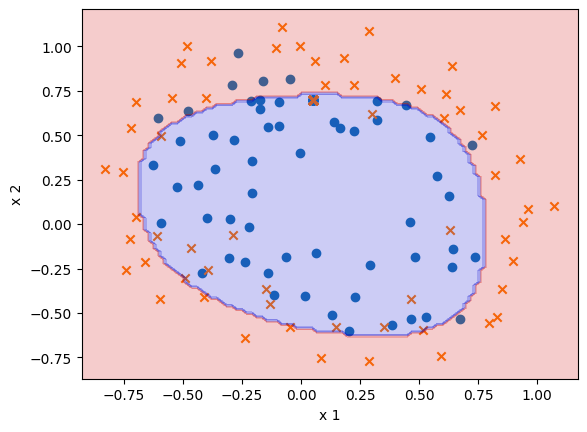

In [18]:

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

drawCircle(theta)

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [19]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=np.zeros((X2.shape[0],1))

for i in range(0,X2.shape[0]):
    y_pred[i] = predict(X2[i,:])
prcision = np.mean(y==y_pred)*100

prcision


81.35593220338984

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

d:\APPS\python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(100, 100) (100, 100)
(100, 100) (100, 100)


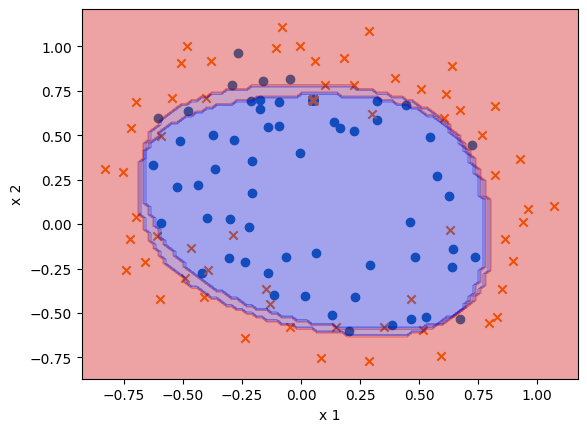

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly.fit_transform(data[:,0:2])

logisticRegr = LogisticRegression()

logisticRegr.fit(X_poly, y)
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')


sktheta = np.column_stack((logisticRegr.intercept_,logisticRegr.coef_))

drawCircle(sktheta.T)
drawCircle(theta)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#essayer plus de valeurs de alpha et varier le nombre d'itération pour voir l'impact sur la précision

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [91]:
#Belaissaoui mohamed elmekki 
#Abdelhadi nabih samy 
# bonne chance